# Importing packages needed for this project.

1. Python libraries:
 - numpy: mathematical calculations and matrix reshaping
 - copy: copying parameters
 - scipy/ndimage and PIL: image processing used for testing the trained models.
 - h5py: Pythonic interface to the HDF5 binart data format. Needed for loading the dataset.
 - matplotlib.pyplot: plotting graphs.
 - os/path: use to work with working path.
2. .py files:
 - [h5data](https://github.com/Thigiang/Deep-Learning-Algorithms/blob/main/dnn/h5data.py): a file that contains the load_dataset function allows us to load our training and testing datasets
 - [dnn](https://github.com/Thigiang/Deep-Learning-Algorithms/blob/main/dnn/dnn.py): a file that contains a deepNeuralNet class with different functions used for deep neural network (dnn) algorithms.

In [22]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import h5py
from PIL import Image
from h5data import load_dataset
from dnn import deepNeuralNet
import os
from path import my_path

ImportError: cannot import name 'deepNeuralNet' from 'dnn' (/Users/gabati/Documents/GitHub/ML/dnn/dnn.py)

In [20]:
my_path = my_path
data_folder = "Datasets"
path = os.path.join(my_path, data_folder)
train_X_orig, train_y, test_X_orig, test_y , classes = load_dataset(path, 'train_catvnoncat.h5', 'test_catvnoncat.h5')

# Exploring the dataset

It shows that there are 209 images in training data.

Each image has size 64x64x3 (3 represents RGB).

Y train is a row vector with 209 columns. Y take values 1 (cat) and 0 (non cat).

To apply the neural network model, we will need to reshape X train and X test datasets. Also, for images dataset, the algorithm will work better if we standardize or normalize before running the ML model. For this dataset, we will standardize by dividing it by its maximum value (255).

In [3]:
print("X train has shape: "+ str(train_X_orig.shape))
print("Y train has shape: "+ str(train_y.shape))
print(classes)

X train has shape: (209, 64, 64, 3)
Y train has shape: (1, 209)
[b'non-cat' b'cat']


y= [1], it is a 'cat' picture.


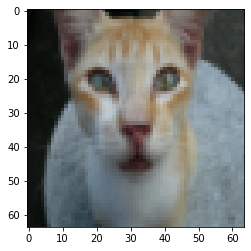

In [4]:
## plot an image in training set
index = 11
plt.imshow(train_X_orig[index])
class_name = classes[np.squeeze(train_y[:, index])].decode("utf-8")
print("y= "+ str(train_y[:, index]) + ", it is a '" + class_name + "' picture.")

In [5]:
train_n_x, test_n_x = train_X_orig.shape[0], test_X_orig.shape[0]
num_px = train_X_orig.shape[1] #num_px is the same for training and testing sets.
print("train_n_x: ", str(train_n_x))
print("test_n_x: ", test_n_x)
print("number of pixels: ", num_px)

train_n_x:  209
test_n_x:  50
number of pixels:  64


# Preprocessing the dataset in 2 steps:

1. Flattening train and test sets: Since our deep learning algorithm takes in input as a matrix of size (number_of_features, number_of_examples), we need to flatten X train and X test datasets using reshape function. train_y and test_y already have correct dimensions, so we will not preprocess them.


2. Standardizing the train and test sets: It appears that the algorithm will work better and faster if we standardize it, so we will standardize them by dividing them by 255. (its maximum value)

In [6]:
train_X_flatten = train_X_orig.reshape(train_n_x, -1).T
test_X_flatten = test_X_orig.reshape(test_n_x, -1).T
print("X train now has shape: ", train_X_flatten.shape)
print("Y train has shape: ", train_y.shape)
print("X test now has shape: ", test_X_flatten.shape)
print("Y test has shape: ", test_y.shape)
print("There are {} training examples in the train set".format(train_X_flatten.shape[1]))
print("There are {} training examples in the test set".format(test_X_flatten.shape[1]))

X train now has shape:  (12288, 209)
Y train has shape:  (1, 209)
X test now has shape:  (12288, 50)
Y test has shape:  (1, 50)
There are 209 training examples in the train set
There are 50 training examples in the test set


## Now the train and test sets have correct dimensions. We will standardize them before we apply the dnn model

In [7]:
train_X =  train_X_flatten/255.
test_X  =  test_X_flatten/255.

# Training and fitting the data using deep neural networks

#### We will first train the model with 2 layers with 5 units in the hidden layer and 1 unit in the output layer

In [8]:
"""
Recall that X has shape of (n_x, m) where n_x is the number of features in each example and
m is the number of examples in the dataset. We need n_x for our training model
"""
train_nx = train_X.shape[0]

"""
Since we are going to train two models with different number of layers, we will create a costs and params dictionaries
to store the costs and learned parameters from the model we train. This will be convinient for us later to plot the costs
and compare the efficiency of the models. We will also define layer_sizes dictionary that store the layer size for each
model.
"""
costs = {}
learned_params = {}
layer_sizes = {"two layers": [train_nx,7, 1], "four layers": [train_nx, 20, 7, 5, 1]}



## Neural networks with 2 layers

In [9]:
 
two_layers_model = deepNeuralnet(train_X, train_y, layer_sizes["two layers"]) #Call the model

params, cost = two_layers_model.fit( num_iterations=2500,learning_rate = 0.0075, print_cost = True)

costs["two layers"]= cost
learned_params["two layers"]= params


Cost at 0th iteration is: 0.6918637927696628.
Cost at 100th iteration is: 0.5537029225544797.
Cost at 200th iteration is: 0.4731580458156138.
Cost at 300th iteration is: 0.4334451680081702.
Cost at 400th iteration is: 0.39722233218178843.
Cost at 500th iteration is: 0.3541760296405532.
Cost at 600th iteration is: 0.3178682330641546.
Cost at 700th iteration is: 0.2619367349539079.
Cost at 800th iteration is: 0.21504748452465697.
Cost at 900th iteration is: 0.14783254253620925.
Cost at 1000th iteration is: 0.1224382657248385.
Cost at 1100th iteration is: 0.10672291619832898.
Cost at 1200th iteration is: 0.09309847148034013.
Cost at 1300th iteration is: 0.07773944083152635.
Cost at 1400th iteration is: 0.06765183252189477.
Cost at 1500th iteration is: 0.05987543380958501.
Cost at 1600th iteration is: 0.054086950289248335.
Cost at 1700th iteration is: 0.04907797800706941.
Cost at 1800th iteration is: 0.04504416193804251.
Cost at 1900th iteration is: 0.04179267537407609.
Cost at 2000th iter

## Neural network with 4 layers

In [10]:

four_layers_model = deepNeuralNet(train_X, train_y, layer_sizes["four layers"])
params, cost = four_layers_model.fit(num_iterations=2500, learning_rate=0.0075, print_cost = True)

costs["four layers"]= cost
learned_params["four layers"]= params


Cost at 0th iteration is: 0.6952836265102327.
Cost at 100th iteration is: 0.6755471846571589.
Cost at 200th iteration is: 0.6609640189015602.
Cost at 300th iteration is: 0.6400738640020716.
Cost at 400th iteration is: 0.6032701712633245.
Cost at 500th iteration is: 0.5494855581124265.
Cost at 600th iteration is: 0.4984248277424657.
Cost at 700th iteration is: 0.4508147379833461.
Cost at 800th iteration is: 0.40305504552980287.
Cost at 900th iteration is: 0.3669483944013128.
Cost at 1000th iteration is: 0.2845232039321382.
Cost at 1100th iteration is: 0.22655042734814013.
Cost at 1200th iteration is: 0.21926915776937378.
Cost at 1300th iteration is: 0.19003100860553912.
Cost at 1400th iteration is: 0.1253198056724918.
Cost at 1500th iteration is: 0.09207616772317269.
Cost at 1600th iteration is: 0.07024747033259512.
Cost at 1700th iteration is: 0.05286097682446153.
Cost at 1800th iteration is: 0.0427468962245403.
Cost at 1900th iteration is: 0.03116161031143965.
Cost at 2000th iteration

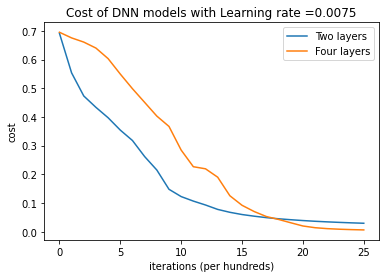

In [13]:
learning_rate = 0.0075
plt.plot(np.squeeze(costs['two layers']), label = 'Two layers')
plt.plot(np.squeeze(costs['four layers']), label = "Four layers")
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.legend()
plt.title("Cost of DNN models with Learning rate =" + str(learning_rate))
plt.show()

## Predict the true labels for test data and train data using the learned parameters

In [18]:
layer_names = ["two layers", 'four layers']
prediction_y={} #{"two layers": [train_y_hat, test_y_hat], "four layers": [train_y_hat, test_y_hat]}
accuracy = {} #{"two layers": [train_accuracy, test_accuracy], "four layer": [train_accuracy, test_accuracy]}

for layerName in layer_names:
    if layerName == 'two layers':
        prediction_y[layerName]= [two_layers_model.predict(train_X, learned_params[layerName]),two_layers_model.predict(test_X, learned_params[layerName])]
        accuracy[layerName]= [two_layers_model.accuracy(prediction_y[layerName][0], train_y), two_layers_model.accuracy(prediction_y[layerName][1], test_y)]
    else:
        prediction_y[layerName]= [four_layers_model.predict(train_X, learned_params[layerName]),two_layers_model.predict(test_X, learned_params[layerName])]
        accuracy[layerName]= [four_layers_model.accuracy(prediction_y[layerName][0], train_y), two_layers_model.accuracy(prediction_y[layerName][1], test_y)]
                                                                                                                
for layerName in layer_names:
    print(layerName, ": \n")
    print("Train accuracy: {}".format(accuracy[layerName][0]))
    print("Test accuracy: {}".format(accuracy[layerName][1]))
# print("Two layer model: \n Test accuracy: {} \n Train accuracy: {}".format(test_accuracy2, train_accuracy2))
# print("Four layer model: \n Test accuracy: {} \n Train accuracy: {}".format(test_accuracy4, train_accuracy4))


two layers : 

Train accuracy: 0.9999999999999998
Test accuracy: 0.72
four layers : 

Train accuracy: 0.9999999999999998
Test accuracy: 0.74
